# Analyzing the results for `lincs_rdkit_hparam`

This is part 2, the results of sweeping the drug-embedding related hyperparameters for all other embeddings

In [1]:
from pathlib import Path
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import seml
from matplotlib import pyplot as plt
from compert.paths  import FIGURE_DIR

matplotlib.style.use("fivethirtyeight")
matplotlib.style.use("seaborn-talk")
matplotlib.rcParams['font.family'] = "monospace"
plt.rcParams['savefig.facecolor'] = 'white'
sns.set_context("poster")
pd.set_option('display.max_columns', 100)

In [2]:
results = seml.get_results(
    "lincs_rdkit_hparam",
    to_data_frame=True,
    fields=["config", "result", "seml", "config_hash"],
    states=["COMPLETED"],
    # filter_dict={"batch_id": 6}
)

  0%|          | 0/297 [00:00<?, ?it/s]

  0%|          | 0/297 [00:00<?, ?it/s]

In [3]:
# filter out the non-relevant rdkit runs
results = results[(results["config.model.hparams.dim"] == 32)]
results["config.model.embedding.model"].value_counts()

grover_base    36
vanilla        36
MPNN           36
jtvae          36
weave          36
seq2seq        36
rdkit          35
GCN            28
zeros           2
Name: config.model.embedding.model, dtype: int64

In [4]:
results.loc[:, [c for c in results.columns if 'disentanglement' in c]]

,result.perturbation disentanglement,result.covariate disentanglement
0,[0.2929533123970032],[[0.8103122711181641]]
1,[0.24740289151668549],[[0.629379391670227]]
3,[0.2513996362686157],[[0.6995764970779419]]
4,[0.2972831428050995],[[0.9510713219642639]]
8,[0.2822000980377197],[[0.7862206697463989]]
...,...,...
292,[0.1613297164440155],[[0.4901745915412903]]
293,[0.16066358983516693],[[0.4947740435600281]]
294,[0.1296727955341339],[[0.4752501845359802]]
295,[0.17969579994678497],[[0.5075414776802063]]


In [5]:
good_disentanglement = results['result.perturbation disentanglement'].apply(lambda x: x[0]) < 0.2

In [6]:
results.loc[good_disentanglement, [c for c in results.columns if 'result' in c]]

,result.epoch,result.stats_epoch,result.loss_reconstruction,result.loss_adv_drugs,result.loss_adv_covariates,result.penalty_adv_drugs,result.penalty_adv_covariates,result.elapsed_time_min,result.training,result.test,result.ood,result.perturbation disentanglement,result.optimal for perturbations,result.covariate disentanglement,result.optimal for covariates,result.total_epochs
17,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",[525],"[5057.547938257456, 2429.702333241701, 2120.39...","[53271.88210773468, 50945.346554756165, 49536....","[17306.876682281494, 16716.71974515915, 16673....","[5971.463605740023, 382.5912035524735, 169.823...","[6.363920687416794, 0.19839770979615423, 0.101...",784.366952,"[[0.9297907875309965, 0.8460637133426092, 0.02...","[[0.932363020380338, 0.8516415238380433, 0.061...","[[0.9320238392267909, 0.859985808708838, 0.013...",[0.08253635466098785],[0.006978477740242026],[[0.1510840356349945]],[[0.012195121951219513]],525
25,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",[150],"[4962.000753134489, 2517.728057682514, 2322.20...","[53235.39468955994, 50731.77633190155, 49426.7...","[17201.264766216278, 16644.660117149353, 16681...","[3554.1937197571024, 12.257525956047544, 17.38...","[6.375064511144956, 0.1077676479708316, 0.1149...",188.328390,"[[0.9092291268830389, 0.7363556157290443, -0.0...","[[0.9033996204535166, 0.755708302060763, -0.10...","[[0.9059013048452991, 0.7745005993970803, -0.1...",[0.12042631953954697],[0.006978477740242026],[[0.5076842308044434]],[[0.012195121951219513]],150
30,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",[150],"[4948.855605274439, 2453.1453342735767, 2282.5...","[53288.06770515442, 50887.49008178711, 49477.0...","[17176.229419469833, 16674.85853624344, 16697....","[4205.1418614134745, 8.1179398398765, 623.2925...","[8.475396957003795, 0.1290189927794927, 0.1235...",194.664017,"[[0.9172299045859333, 0.7768192965393568, -0.0...","[[0.9170830324292183, 0.7976464008291563, -0.0...","[[0.9189726885940347, 0.8168569899031094, -0.0...",[0.13408192992210388],[0.006978477740242026],[[0.4625144600868225]],[[0.012195121951219513]],150
31,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",[150],"[5007.915769487619, 2496.940879970789, 2284.01...","[53162.24500465393, 50518.11715507507, 49409.5...","[17226.646740198135, 16675.593737840652, 16653...","[3164.3060682879855, 13.428873880301929, 1168....","[8.78075922242897, 0.16737031196362295, 0.0867...",188.264804,"[[0.9085888829856799, 0.7343637996105478, -0.0...","[[0.9104640732208887, 0.7702424615621567, -0.1...","[[0.9137835837900639, 0.792331550270319, -0.14...",[0.16232889890670776],[0.006978477740242026],[[0.5156301856040955]],[[0.012195121951219513]],150
32,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",[575],"[5047.344274520874, 2543.3769514262676, 2261.1...","[53226.56231594086, 50754.988428115845, 49454....","[17204.479621887207, 16665.131385326385, 16694...","[3480.4302035069873, 65.98673608250839, 358.62...","[8.46309389793987, 0.11603951289225733, 0.0842...",648.639952,"[[0.9230386534653082, 0.8052882943159524, -0.0...","[[0.9265063469608624, 0.8429866299033165, 0.02...","[[0.9289303555020264, 0.8517431936093739, -0.0...",[0.05283024534583092],[0.006978477740242026],[[0.148847758769989]],[[0.012195121951219513]],575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",[150],"[4882.579974740744, 2451.4341146051884, 2193.2...","[53252.89230918884, 50646.04741382599, 49394.0...","[17180.828367471695, 16728.30500435829, 16705....","[3345.3977360033678, 36.28642527170199, 1872.7...","[6.457159842187821, 0.18037949557174215, 0.096...",196.755704,"[[0.900255275836028, 0.688797431087681, -0.078...","[[0.8719925791025162, 0.6070081015427907, -0.1...","[[0.872716808957713, 0.6138018896537167, -0.19...",[0.17785601317882538],[0.006978477740242026],[[0.6351683139801025]],[[0.012195121951219513]],150
292,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,

## Preprocessing the results dataframe

In [7]:
sweeped_params = [
    "model.hparams.dim",
    "model.hparams.dropout",
    "model.hparams.dosers_width",
    "model.hparams.dosers_depth",
    "model.hparams.dosers_lr",
    "model.hparams.dosers_wd",
    "model.hparams.autoencoder_width",
    "model.hparams.autoencoder_depth",
    "model.hparams.autoencoder_lr",
    "model.hparams.autoencoder_wd",
    "model.hparams.adversary_width",
    "model.hparams.adversary_depth",
    "model.hparams.adversary_lr",
    "model.hparams.adversary_wd",
    "model.hparams.adversary_steps",
    "model.hparams.reg_adversary",
    "model.hparams.penalty_adversary",
    "model.hparams.batch_size",
    "model.hparams.step_size_lr",
    "model.hparams.embedding_encoder_width",
    "model.hparams.embedding_encoder_depth",
]

In [8]:
# percentage of training runs that resulted in NaNs
import math

nan_results = results[results["result.loss_reconstruction"].apply(lambda x: math.isnan(sum(x)))]
results_clean = results[~results["result.loss_reconstruction"].apply(lambda x: math.isnan(sum(x)))].copy()
print(len(nan_results) / len(results))

0.0


In [9]:
results_clean["config.model.embedding.model"].value_counts()

grover_base    36
vanilla        36
MPNN           36
jtvae          36
weave          36
seq2seq        36
rdkit          35
GCN            28
zeros           2
Name: config.model.embedding.model, dtype: int64

In [10]:
# calculate some stats
get_mean = lambda x: np.array(x)[-1, 0]
get_mean_de = lambda x: np.array(x)[-1, 1]

results_clean["result.training_mean"] = results_clean["result.training"].apply(get_mean)
results_clean["result.training_mean_de"] = results_clean["result.training"].apply(get_mean_de)
results_clean["result.val_mean"] = results_clean["result.test"].apply(get_mean)
results_clean["result.val_mean_de"] = results_clean["result.test"].apply(get_mean_de)
results_clean["result.test_mean"] = results_clean["result.ood"].apply(get_mean)
results_clean["result.test_mean_de"] = results_clean["result.ood"].apply(get_mean_de)
results_clean["result.perturbation disentanglement"] = results_clean["result.perturbation disentanglement"].apply(lambda x: x[0])
results_clean["result.covariate disentanglement"] = results_clean["result.covariate disentanglement"].apply(lambda x: x[0][0])


results_clean

,_id,config_hash,seml.executable,seml.name,seml.output_dir,seml.conda_environment,seml.working_dir,seml.source_files,seml.output_file,seml.command,seml.temp_dir,config.overwrite,config.db_collection,config.dataset.data_params.covariate_keys,config.dataset.data_params.dataset_path,config.dataset.data_params.degs_key,config.dataset.data_params.dose_key,config.dataset.data_params.pert_category,config.dataset.data_params.perturbation_key,config.dataset.data_params.smiles_key,config.dataset.data_params.split_key,config.dataset.data_params.use_drugs_idx,config.dataset.dataset_type,config.model.additional_params.decoder_activation,config.model.additional_params.doser_type,config.model.additional_params.patience,config.model.additional_params.seed,config.model.embedding.directory,config.model.embedding.model,config.model.hparams.adversary_depth,config.model.hparams.adversary_lr,config.model.hparams.adversary_steps,config.model.hparams.adversary_wd,config.model.hparams.adversary_width,config.model.hparams.autoencoder_depth,config.model.hparams.autoencoder_lr,config.model.hparams.autoencoder_wd,config.model.hparams.autoencoder_width,config.model.hparams.batch_size,config.model.hparams.dim,config.model.hparams.dosers_depth,config.model.hparams.dosers_lr,config.model.hparams.dosers_wd,config.model.hparams.dosers_width,config.model.hparams.dropout,config.model.hparams.embedding_encoder_depth,config.model.hparams.embedding_encoder_width,config.model.hparams.penalty_adversary,config.model.hparams.reg_adversary,config.model.hparams.step_size_lr,config.model.load_pretrained,config.model.pretrained_model_hashes,config.model.pretrained_model_path,config.profiling.outdir,config.profiling.run_profiler,config.training.checkpoint_freq,config.training.full_eval_during_train,config.training.max_minutes,config.training.num_epochs,config.training.run_eval_disentangle,config.training.save_checkpoints,config.training.save_dir,config.seed,result.epoch,result.stats_epoch,result.loss_reconstruction,result.loss_adv_drugs,result.loss_adv_covariates,result.penalty_adv_drugs,result.penalty_adv_covariates,result.elapsed_time_min,result.training,result.test,result.ood,result.perturbation disentanglement,result.optimal for perturbations,result.covariate disentanglement,result.optimal for covariates,result.total_epochs,config.model.append_ae_layer,result.training_mean,result.training_mean_de,result.val_mean,result.val_mean_de,result.test_mean,result.test_mean_de
0,1,951c6cef0caf7660d98b49c30a3cb0ca,compert/seml_sweep_icb.py,lincs_rdkit_hparam,/mnt/home/icb/simon.boehm/Masters_thesis/chemi...,chemical_CPA,/mnt/home/icb/simon.boehm/Masters_thesis/chemi...,"[[compert/data.py, 61e6ea51e98f7c50f0d48fcd], ...",/mnt/home/icb/simon.boehm/Masters_thesis/chemi...,python compert/seml_sweep_icb.py with 'profili...,/tmp/2a02983a-dfa5-4b31-aaed-da93cd959885,1,lincs_rdkit_hparam,cell_id,/storage/groups/ml01/projects/2021_chemicalCPA...,rank_genes_groups_cov,pert_dose,cov_drug_dose_name,pert_id,canonical_smiles,random_split,True,lincs,linear,amortized,3,1337,None,rdkit,4,0.000364,2,7.459343e-07,128,3,0.000561,1.329292e-07,512,64,32,2,0.000561,1.329292e-07,128,0.187270,3,512,2.368864,15.355287,100,False,None,None,./,False,25,False,1200,1500,True,True,/storage/groups/ml01/projects/2021_chemicalCPA...,104427122,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",[125],"[7668.60909858346, 4221.832088768482, 3187.043...","[106483.20264530182, 99843.51373004913, 98521....","[33686.32508325577, 33318.72813773155, 33357.3...","[2403.7874334401477, 384.58492319871226, 79.95...","[12.919138175999706, 0.18419641748869253, 0.17...",347.128484,"[[0.9075990746769373, 0.7284160405249093, -0.0...","[[0.8994284446040789, 0.7162557100256284, -0.1...","[[0.9028372780552932, 0.7350117628063474, -0.1...",0.292953,[0.006978477740242026],0.810312,[[0.012195121951219513]],125,NaN,0.907599,0.728416,0.899428,0.716256,0.902837,0.735012
1,2,77032057a974ed92ba42eb00b4818b39,compert/seml_sweep_icb.py,lincs_rdki

## Look at early stopping

Text(0.5, 1.0, 'Total epochs before final stopping (min 125)')

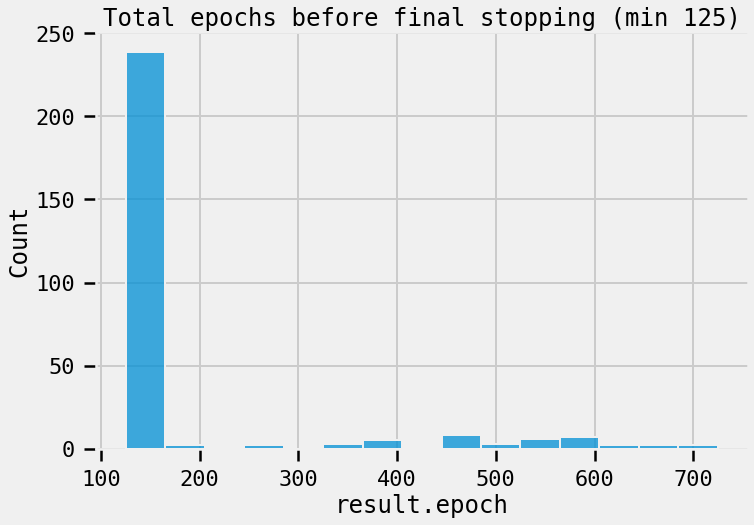

In [11]:
ax = sns.histplot(data=results_clean["result.epoch"].apply(max), bins=15)
ax.set_title("Total epochs before final stopping (min 125)")

## Look at $r^2$ reconstruction

### DE genes

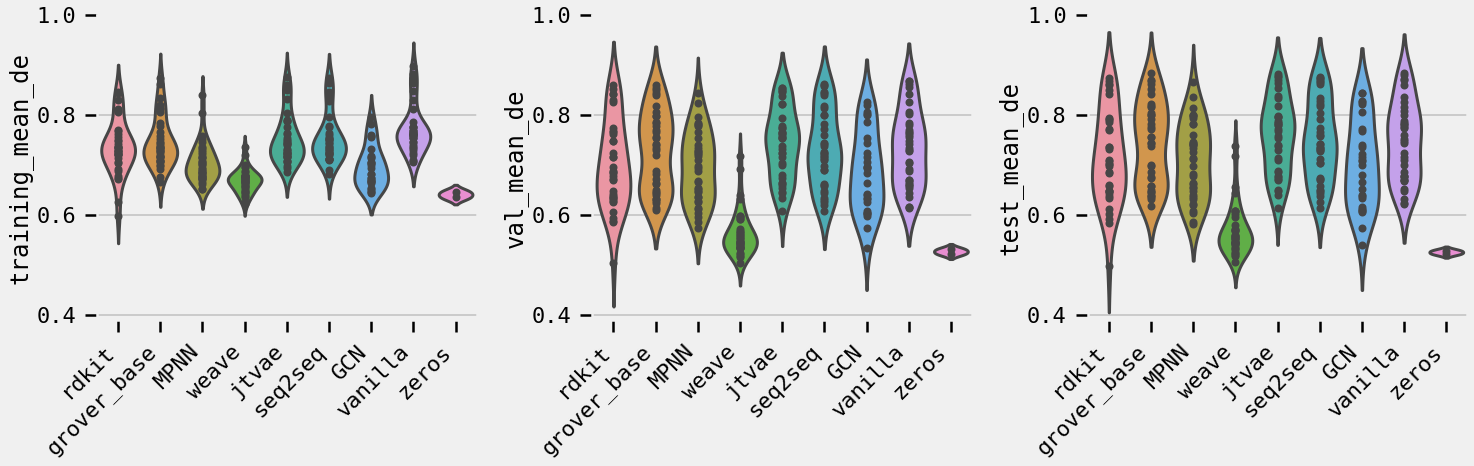

In [12]:
rows = 1 
cols = 3
fig, ax = plt.subplots(rows, cols, figsize=(7*cols, 7*rows), sharex=True)

for i, y in enumerate(("result.training_mean_de", "result.val_mean_de", "result.test_mean_de")):
    sns.violinplot(data=results_clean, x="config.model.embedding.model", y=y, inner='point' ,ax=ax[i], scale='width')
    ax[i].set_ylim([0.39,1])
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45, ha="right")
    ax[i].set_xlabel('')
    ax[i].set_ylabel(y.split('.')[-1])
    plt.tight_layout()

### All genes

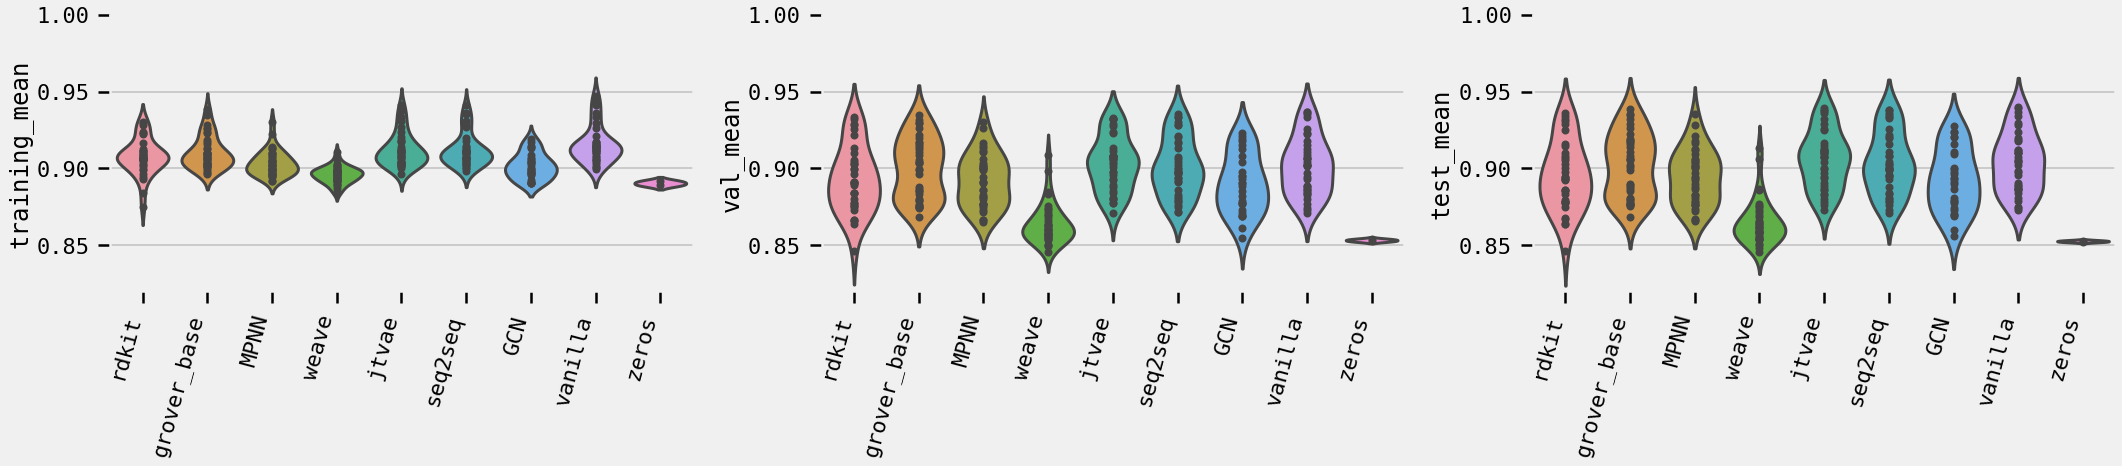

In [13]:
rows = 1 
cols = 3
fig, ax = plt.subplots(rows, cols, figsize=(10*cols, 7*rows), sharex=True)

for i, y in enumerate(("result.training_mean", "result.val_mean", "result.test_mean")):
    sns.violinplot(data=results_clean, x="config.model.embedding.model", y=y, inner='point' ,ax=ax[i], scale="width")
    ax[i].set_ylim([0.82,1])
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=75, ha='right')
    ax[i].set_xlabel('')
    ax[i].set_ylabel(y.split('.')[-1])
    plt.tight_layout()

## Look at disentanglement scores

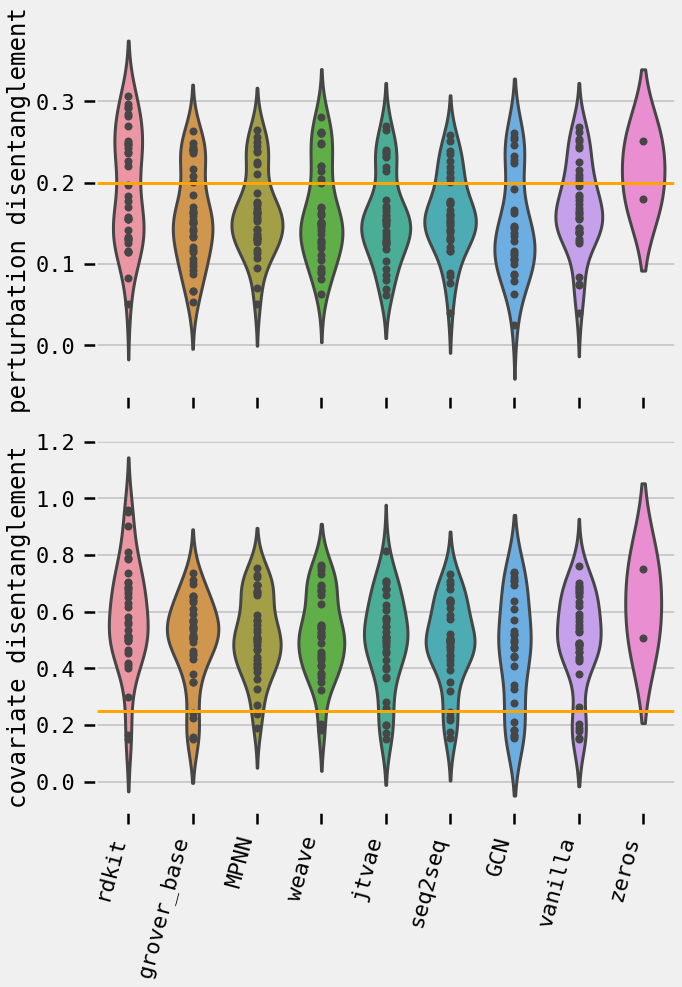

In [14]:
rows = 2 
cols = 1
fig, ax = plt.subplots(rows, cols, figsize=(10*cols, 7*rows), sharex=True)

max_entangle = [0.2, 0.25]
for i, y in enumerate(["result.perturbation disentanglement", "result.covariate disentanglement"]):
    sns.violinplot(data=results_clean, x="config.model.embedding.model", y=y, inner='point' ,ax=ax[i])
    # ax[i].set_ylim([0,1])
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=75, ha='right')
    ax[i].axhline(max_entangle[i], color='orange')
    ax[i].set_xlabel('')
    ax[i].set_ylabel(y.split('.')[-1])
plt.tight_layout()

## Subselect to disentangled models

In [15]:
n_top = 5

def performance_condition (emb, max_entangle, max_entangle_cov): 
    cond = (results_clean["config.model.embedding.model"] == emb) 
    cond = cond & (results_clean["result.perturbation disentanglement"] < max_entangle) 
    cond = cond & (results_clean["result.covariate disentanglement"] < max_entangle_cov)
    return cond 

best = []
top_one = []
best_disentangled = []
for embedding in list(results_clean["config.model.embedding.model"].unique()):
    df = results_clean[performance_condition(embedding, 0.2, 1)]
    print(embedding, len(df))
    best.append(df.sort_values(by="result.val_mean_de", ascending=False).head(n_top))
    top_one.append(df.sort_values(by="result.val_mean_de", ascending=False).head(1))
    best_disentangled.append(df.sort_values(by="result.covariate disentanglement", ascending=True).head(n_top))

best = pd.concat(best)
top_one = pd.concat(top_one)
best_disentangled = pd.concat(best_disentangled)

rdkit 19
grover_base 25
MPNN 27
weave 25
jtvae 27
seq2seq 26
GCN 21
vanilla 25
zeros 1


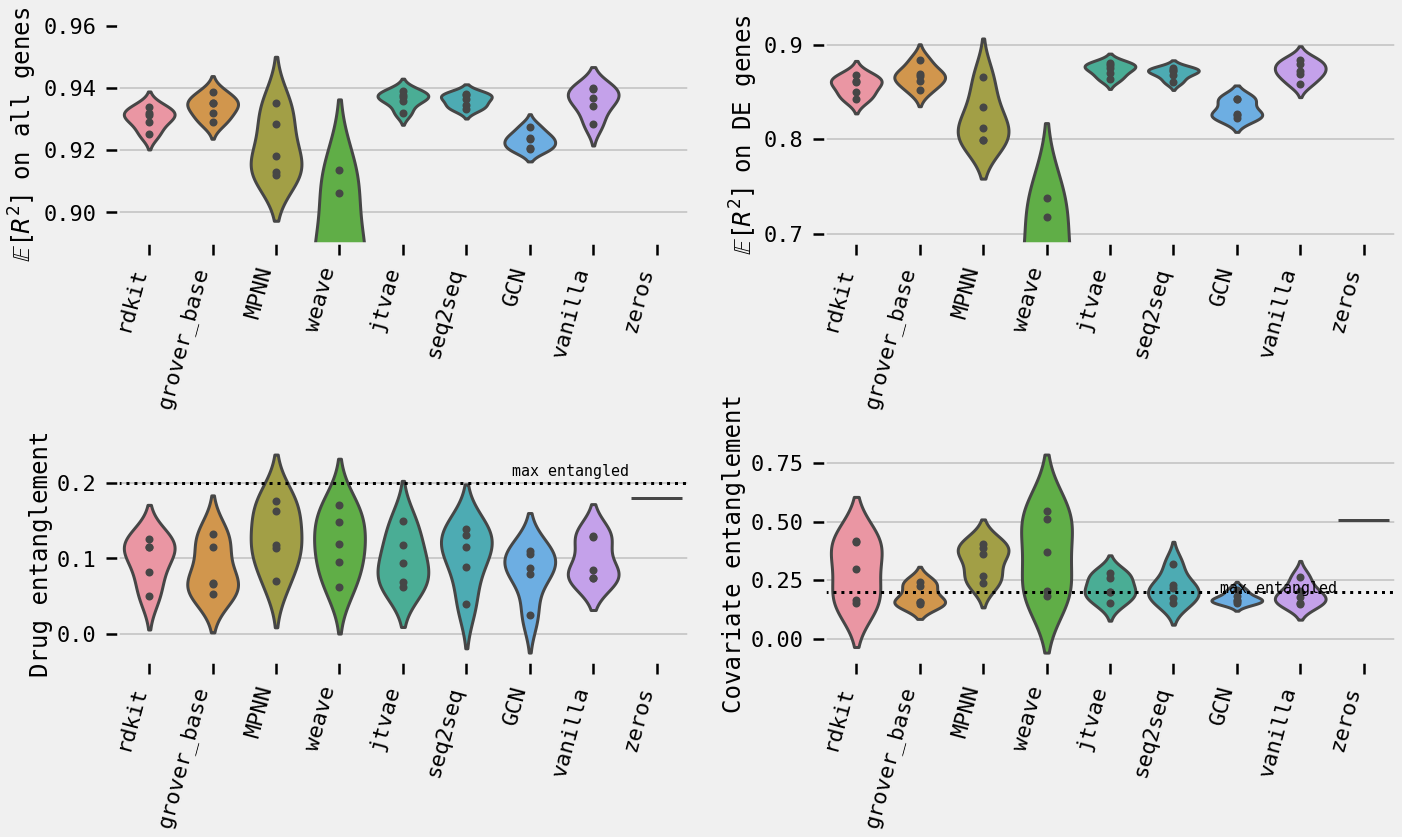

In [16]:
# All genes, DE genes, disentanglement
rows, cols = 2, 2
fig, ax = plt.subplots(rows, cols, figsize=(10*cols,6*rows))

for i, y in enumerate(["result.test_mean", "result.test_mean_de", "result.perturbation disentanglement", "result.covariate disentanglement"]):
    sns.violinplot(data=best, x="config.model.embedding.model", y=y, inner='points', ax=ax[i//cols, i%cols], scale='width')
    ax[i//cols, i%cols].set_xticklabels(ax[i//cols, i%cols].get_xticklabels(), rotation=75, ha='right')
    ax[i//cols, i%cols].set_xlabel('')
    ax[i//cols, i%cols].set_ylabel(y.split('.')[-1])
ax[0,0].set_ylabel("$\mathbb{E}\,[R^2]$ on all genes")
ax[0,0].set_ylim([0.89, 0.96])
ax[0,1].set_ylabel("$\mathbb{E}\,[R^2]$ on DE genes")
ax[0,1].set_ylim([0.69, 0.92])
ax[1,0].set_ylabel("Drug entanglement")
ax[1,0].axhline(0.2,ls=':' ,color='black')
ax[1,0].text(6.65, 0.215, 'max entangled', fontsize=15, va='center', ha='center')
ax[1,1].set_ylabel("Covariate entanglement")
ax[1,1].text(6.65, 0.215, 'max entangled', fontsize=15, va='center', ha='center')
ax[1,1].axhline(0.2, ls=':', color='black')
plt.tight_layout()

plt.savefig(FIGURE_DIR/'lincs_pretraining.eps', format='eps', bbox_inches='tight')

Top 3 best disentangled models per embedding type

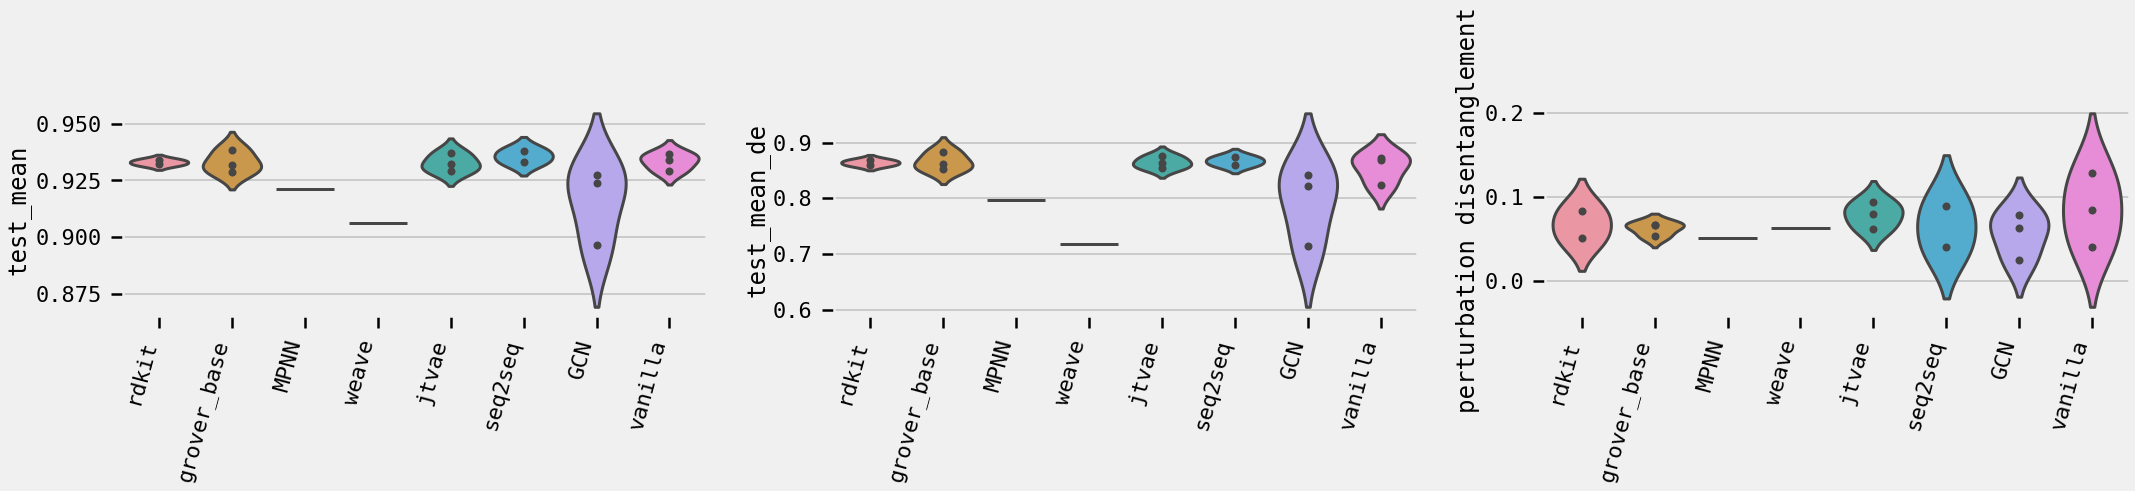

In [60]:
# All genes, DE genes, disentanglement
rows, cols = 1, 3
fig, ax = plt.subplots(rows, cols, figsize=(10*cols,6*rows))

for i, y in enumerate(["result.test_mean", "result.test_mean_de", "result.perturbation disentanglement"]):
    sns.violinplot(data=best_disentangled, x="config.model.embedding.model", y=y, inner='points', ax=ax[i], scale='width')
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=75, ha='right')
    ax[i].set_xlabel('')
    ax[i].set_ylabel(y.split('.')[-1])

plt.tight_layout()

Top one performing models

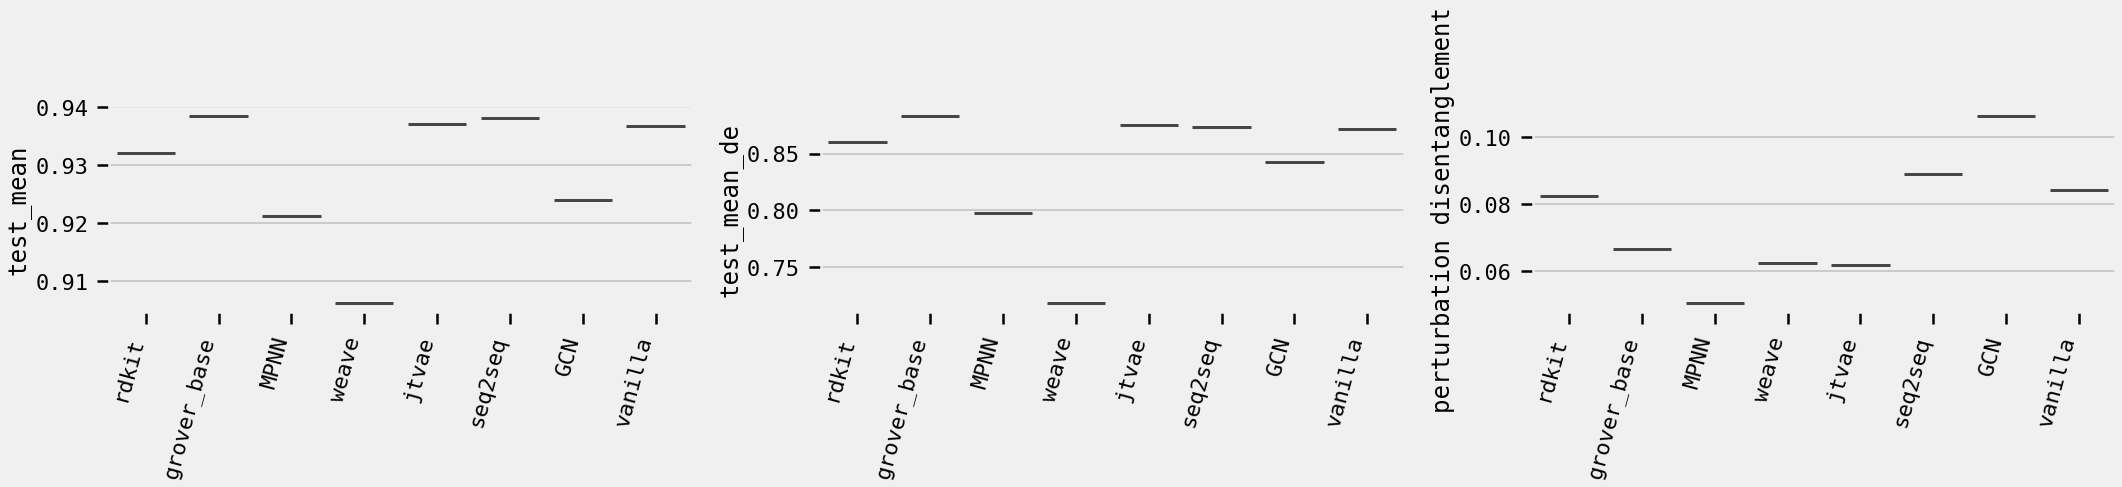

In [61]:
# All genes, DE genes, disentanglement
rows, cols = 1, 3
fig, ax = plt.subplots(rows, cols, figsize=(10*cols,6*rows))

for i, y in enumerate(["result.test_mean", "result.test_mean_de", "result.perturbation disentanglement"]):
    sns.violinplot(data=top_one, x="config.model.embedding.model", y=y, inner='points', ax=ax[i], scale='width')
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=75, ha='right')
    ax[i].set_xlabel('')
    ax[i].set_ylabel(y.split('.')[-1])

plt.tight_layout()

## Take a deeper look in the `.config` of the best performing models

In [62]:
top_one['config.model.embedding.model']

17           rdkit
65     grover_base
233           MPNN
85           weave
54           jtvae
122        seq2seq
198            GCN
148        vanilla
Name: config.model.embedding.model, dtype: object

In [58]:
top_one[["config." + col for col in sweeped_params] + ["result.perturbation disentanglement", "result.test_mean", "result.test_mean_de"]]

,config.model.hparams.dim,config.model.hparams.dropout,config.model.hparams.dosers_width,config.model.hparams.dosers_depth,config.model.hparams.dosers_lr,config.model.hparams.dosers_wd,config.model.hparams.autoencoder_width,config.model.hparams.autoencoder_depth,config.model.hparams.autoencoder_lr,config.model.hparams.autoencoder_wd,config.model.hparams.adversary_width,config.model.hparams.adversary_depth,config.model.hparams.adversary_lr,config.model.hparams.adversary_wd,config.model.hparams.adversary_steps,config.model.hparams.reg_adversary,config.model.hparams.penalty_adversary,config.model.hparams.batch_size,config.model.hparams.step_size_lr,config.model.hparams.embedding_encoder_width,config.model.hparams.embedding_encoder_depth,result.perturbation disentanglement,result.test_mean,result.test_mean_de
17,32,0.262378,64,3,0.001121,3.752056e-07,256,4,0.001121,3.752056e-07,128,3,0.000806,0.000004,2,24.082073,3.347776,128,50,128,4,0.082536,0.932024,0.859986
65,32,0.262378,512,2,0.000561,1.329292e-07,256,4,0.001121,3.752056e-07,128,3,0.000806,0.000004,2,24.082073,3.347776,128,50,512,3,0.066660,0.938519,0.883525
98,32,0.262378,64,2,0.001575,6.251374e-07,256,4,0.001121,3.752056e-07,128,3,0.000806,0.000004,2,24.082073,3.347776,128,50,128,4,0.070324,0.935279,0.865659
89,32,0.262378,512,2,0.000205,2.938028e-08,256,4,0.001121,3.752056e-07,128,3,0.000806,0.000004,2,24.082073,3.347776,128,50,128,3,0.094955,0.913516,0.738424
54,32,0.262378,64,2,0.000205,2.937538e-08,256,4,0.001121,3.752056e-07,128,3,0.000806,0.000004,2,24.082073,3.347776,128,50,256,4,0.062045,0.937029,0.875669
122,32,0.262378,256,3,0.005399,3.967605e-06,256,4,0.001121,3.752056e-07,128,3,0.000806,0.000004,2,24.082073,3.347776,128,50,256,4,0.088928,0.938096,0.873175
198,32,0.262378,512,3,0.008706,8.123245e-06,256,4,0.001121,3.752056e-07,128,3,0.000806,0.000004,2,24.082073,3.347776,128,50,128,3,0.106247,0.924004,0.842642
148,32,0.262378,512,2,0.000233,3.549879e-08,256,4,0.001121,3.752056e-07,128,3,0.000806,0.000004,2,24.082073,3.347776,128,50,128,2,0.084075,0.936688,0.872188


In [59]:
sweeped_cols = np.array(["config." + col for col in sweeped_params])
top_one[['config.model.embedding.model'] + list(sweeped_cols[best[sweeped_cols].std() > 1e-5])]

,config.model.embedding.model,config.model.hparams.dosers_width,config.model.hparams.dosers_depth,config.model.hparams.dosers_lr,config.model.hparams.embedding_encoder_width,config.model.hparams.embedding_encoder_depth
17,rdkit,64,3,0.001121,128,4
65,grover_base,512,2,0.000561,512,3
98,MPNN,64,2,0.001575,128,4
89,weave,512,2,0.000205,128,3
54,jtvae,64,2,0.000205,256,4
122,seq2seq,256,3,0.005399,256,4
198,GCN,512,3,0.008706,128,3
148,vanilla,512,2,0.000233,128,2


In [20]:
# -> Middle sized doser width
results_clean['config.model.hparams.dosers_width'].value_counts()

512    63
128    32
256    31
64     16
Name: config.model.hparams.dosers_width, dtype: int64

In [21]:
# Check dim
results_clean['config.model.hparams.dim'].value_counts()

32    142
Name: config.model.hparams.dim, dtype: int64

In [60]:
# Only GCN was able to improve in {batch_id: 6}
top_one[[c for c in results_clean.columns if ('hash' in c) | ('embedding.model' in c)]]

,config_hash,config.model.embedding.model,config.model.pretrained_model_hashes
17,4f061dbfc7af05cf84f06a724b0c8563,rdkit,None
65,ff420aea264fca7668ecb147f60762a1,grover_base,None
98,ff9629a1b216372be8b205556cabc6fb,MPNN,None
89,1244d8b476696a7e1c01fd05d73d7450,weave,None
54,a7060ac4e2c6154e64a13acd414cbba2,jtvae,None
122,e31119adc782888d5b75c57f8c803ee0,seq2seq,None
198,aedb25c686fb856e574a951f749b8dcf,GCN,None
148,ba3569d1f5898a6bb964b7fafbed2641,vanilla,None


In [33]:
best[[c for c in results_clean.columns if ('hash' in c) | ('embedding.model' in c)]]

,config_hash,config.model.embedding.model,config.model.pretrained_model_hashes
17,4f061dbfc7af05cf84f06a724b0c8563,rdkit,None
65,ff420aea264fca7668ecb147f60762a1,grover_base,None
98,ff9629a1b216372be8b205556cabc6fb,MPNN,None
89,1244d8b476696a7e1c01fd05d73d7450,weave,None
54,a7060ac4e2c6154e64a13acd414cbba2,jtvae,None
122,e31119adc782888d5b75c57f8c803ee0,seq2seq,None
84,6b078a999327392c2d1b34c96154e317,GCN,None
148,ba3569d1f5898a6bb964b7fafbed2641,vanilla,None


In [61]:
best[best["config.model.embedding.model"]=="GCN"]

,_id,config_hash,seml.executable,seml.name,seml.output_dir,seml.conda_environment,seml.working_dir,seml.source_files,seml.output_file,seml.command,seml.temp_dir,config.overwrite,config.db_collection,config.dataset.data_params.covariate_keys,config.dataset.data_params.dataset_path,config.dataset.data_params.degs_key,config.dataset.data_params.dose_key,config.dataset.data_params.pert_category,config.dataset.data_params.perturbation_key,config.dataset.data_params.smiles_key,config.dataset.data_params.split_key,config.dataset.data_params.use_drugs_idx,config.dataset.dataset_type,config.model.additional_params.decoder_activation,config.model.additional_params.doser_type,config.model.additional_params.patience,config.model.additional_params.seed,config.model.embedding.directory,config.model.embedding.model,config.model.hparams.adversary_depth,config.model.hparams.adversary_lr,config.model.hparams.adversary_steps,config.model.hparams.adversary_wd,config.model.hparams.adversary_width,config.model.hparams.autoencoder_depth,config.model.hparams.autoencoder_lr,config.model.hparams.autoencoder_wd,config.model.hparams.autoencoder_width,config.model.hparams.batch_size,config.model.hparams.dim,config.model.hparams.dosers_depth,config.model.hparams.dosers_lr,config.model.hparams.dosers_wd,config.model.hparams.dosers_width,config.model.hparams.dropout,config.model.hparams.embedding_encoder_depth,config.model.hparams.embedding_encoder_width,config.model.hparams.penalty_adversary,config.model.hparams.reg_adversary,config.model.hparams.step_size_lr,config.model.load_pretrained,config.model.pretrained_model_hashes,config.model.pretrained_model_path,config.profiling.outdir,config.profiling.run_profiler,config.training.checkpoint_freq,config.training.full_eval_during_train,config.training.max_minutes,config.training.num_epochs,config.training.run_eval_disentangle,config.training.save_checkpoints,config.training.save_dir,config.seed,result.epoch,result.stats_epoch,result.loss_reconstruction,result.loss_adv_drugs,result.loss_adv_covariates,result.penalty_adv_drugs,result.penalty_adv_covariates,result.elapsed_time_min,result.training,result.test,result.ood,result.perturbation disentanglement,result.optimal for perturbations,result.covariate disentanglement,result.optimal for covariates,result.total_epochs,result.training_mean,result.training_mean_de,result.val_mean,result.val_mean_de,result.test_mean,result.test_mean_de
198,217,aedb25c686fb856e574a951f749b8dcf,compert/seml_sweep_icb.py,lincs_all_emb_hparam,/mnt/home/icb/leon.hetzel/git/CPA_graphs/sweep...,chemical_CPA,/mnt/home/icb/leon.hetzel/git/CPA_graphs,"[[compert/model.py, 61edea8210fb517e56394a04],...",/mnt/home/icb/leon.hetzel/git/CPA_graphs/sweep...,python compert/seml_sweep_icb.py with 'model={...,/tmp/19aa988e-916f-4f7d-abb2-e636a8fb27ad,217,lincs_rdkit_hparam,cell_id,/storage/groups/ml01/projects/2021_chemicalCPA...,rank_genes_groups_cov,pert_dose,cov_drug_dose_name,pert_id,canonical_smiles,random_split,True,lincs,linear,amortized,4,1337,None,GCN,3,0.000806,2,0.000004,128,4,0.001121,3.752056e-07,256,128,32,3,0.008706,0.000008,512,0.262378,3,128,3.347776,24.082073,50,False,None,None,./,False,25,False,1200,1500,True,True,/storage/groups/ml01/projects/2021_chemicalCPA...,418271211,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",[400],"[4984.7174326479435, 2484.0432618260384, 2312....","[53269.72157001495, 50746.956535339355, 49420....","[17172.883855342865, 16654.538200855255, 16673...","[3785.2242544860783, 4.909561807281155, 8.5487...","[7.180622446049711, 0.14852189952171102, 0.092...",495.864475,"[[0.9191971124719209, 0.796109696340977, -0.04...","[[0.9213831106821696, 0.826165072619915, -0.02...","[[0.9240037383777755, 0.842641816075359, -0.08...",0.106247,[0.006978477740242026],[[0.16416868567466736]],[[0.012195121951219513]],400,0.919197,0.796110,0.921383,0.826165,0.924004,0.842642
84,103,6b078a999327392c2d1b34c96154e317,compert/seml_sweep_icb.py,lincs_all_emb_hparam,/mnt/home/icb/l

## Look at correlation between disentanglement and reconstruction

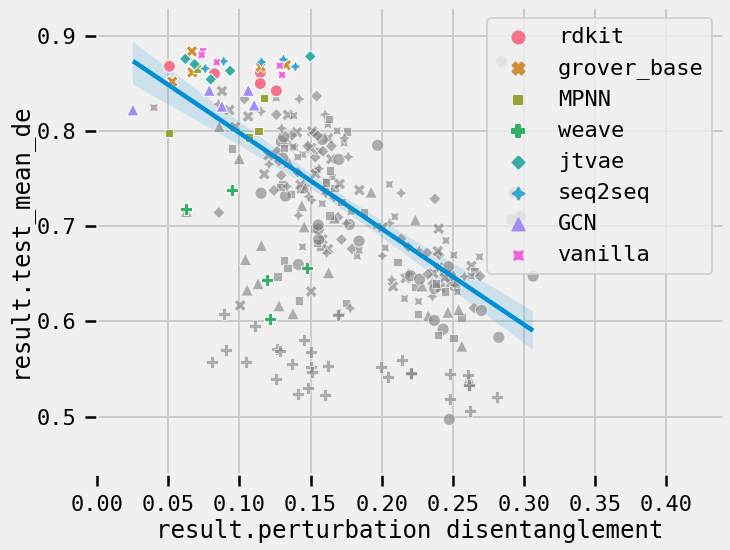

In [120]:
fig, ax = plt.subplots(figsize=(10,8))

# Regression without weave
sns.regplot(data=results_clean[results_clean["config.model.embedding.model"] != 'weave'], x='result.perturbation disentanglement', y='result.test_mean_de', ax=ax, scatter=False)

sns.scatterplot(data=results_clean, x='result.perturbation disentanglement', y='result.test_mean_de', ax=ax, style="config.model.embedding.model", legend=None, color='grey', alpha=0.6)
sns.scatterplot(data=best, x='result.perturbation disentanglement', y='result.test_mean_de', hue="config.model.embedding.model", ax=ax, style="config.model.embedding.model")
ax.set_xlim([0,0.44])
ax.set_ylim([0.44,0.93])
ax.legend(loc='best')

## Look at epochs vs. performance

In [121]:
[c for c in results_clean.columns if 'epochs' in c]

['config.training.num_epochs', 'result.total_epochs']

<AxesSubplot:xlabel='result.total_epochs', ylabel='result.test_mean_de'>

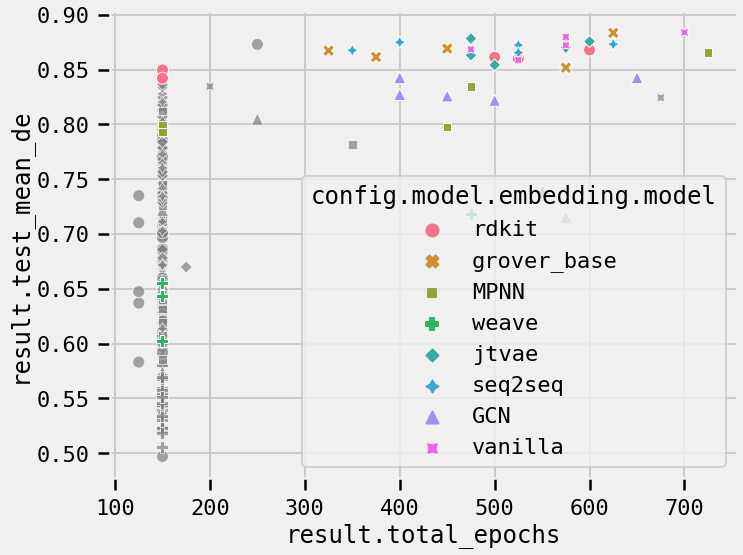

In [131]:
fig, ax = plt.subplots(figsize=(10,8))
sns.scatterplot(data=results_clean, x='result.total_epochs', y='result.test_mean_de', ax=ax, style="config.model.embedding.model", color='grey', alpha=0.7, legend=None)
sns.scatterplot(data=best, x='result.total_epochs', y='result.test_mean_de', ax=ax, style="config.model.embedding.model", hue="config.model.embedding.model")

_____

In [42]:
dis_drug = []
dis_cov = []
r2_all = []
r2_degs = []
r2_val_all = []
r2_val_degs = []
model = []

for _model, _df in best_disentangled.groupby('config.model.embedding.model'): 
    if _model not in ['zeros', 'vanilla', 'seq2seq']:
        model.append(_model)
        dis_drug.append(f'${_df["result.perturbation disentanglement"].mean():.2f} \pm {_df["result.perturbation disentanglement"].std():.2f}$')
        dis_cov.append(f'${_df["result.covariate disentanglement"].mean():.2f} \pm {_df["result.covariate disentanglement"].std():.2f}$')
        r2_all.append(f'${_df["result.test_mean"].mean():.2f} \pm {_df["result.test_mean"].std():.2f}$')
        r2_degs.append(f'${_df["result.test_mean_de"].mean():.2f} \pm {_df["result.test_mean_de"].std():.2f}$')
        #     r2_val_all.append(_df["result.val_mean"].mean())
        #     r2_val_degs.append(_df["result.val_mean_de"].mean())


In [43]:
df_dict = {
    "Model": model, 
    "Drug": dis_drug,
    "Cell line": dis_cov,
    "Mean $r^2$ all": r2_all,
    "Mean $r^2$ DEGs": r2_degs,
}

df = pd.DataFrame.from_dict(df_dict)
df = df.set_index('Model')

In [44]:
print(df.to_latex())

\begin{tabular}{lllll}
\toprule
{} &             Drug &        Cell line &   Mean \$r\textasciicircum 2\$ all &  Mean \$r\textasciicircum 2\$ DEGs \\
Model       &                  &                  &                  &                  \\
\midrule
GCN         &  \$0.08 \textbackslash pm 0.03\$ &  \$0.17 \textbackslash pm 0.01\$ &  \$0.92 \textbackslash pm 0.01\$ &  \$0.81 \textbackslash pm 0.05\$ \\
MPNN        &  \$0.10 \textbackslash pm 0.03\$ &  \$0.28 \textbackslash pm 0.07\$ &  \$0.92 \textbackslash pm 0.01\$ &  \$0.82 \textbackslash pm 0.03\$ \\
grover\_base &  \$0.09 \textbackslash pm 0.03\$ &  \$0.19 \textbackslash pm 0.04\$ &  \$0.93 \textbackslash pm 0.00\$ &  \$0.87 \textbackslash pm 0.01\$ \\
jtvae       &  \$0.08 \textbackslash pm 0.02\$ &  \$0.20 \textbackslash pm 0.04\$ &  \$0.93 \textbackslash pm 0.00\$ &  \$0.87 \textbackslash pm 0.01\$ \\
rdkit       &  \$0.10 \textbackslash pm 0.04\$ &  \$0.29 \textbackslash pm 0.13\$ &  \$0.93 \textbackslash pm 0.01\$ &  \$0.85 \t

In [58]:
dis_drug = []
dis_cov = []
r2_all = []
r2_degs = []
r2_val_all = []
r2_val_degs = []
model = []

for _model, _df in best_disentangled.groupby('config.model.embedding.model'): 
    _df = _df.sort_values('result.val_mean_de', ascending=False).head(1)
    if _model not in ['zeros', 'vanilla', 'seq2seq']:
        model.append(_model)
        dis_drug.append(_df["result.perturbation disentanglement"].mean())
        dis_cov.append(_df["result.covariate disentanglement"].mean())
        r2_all.append(_df["result.test_mean"].mean())
        r2_degs.append(_df["result.test_mean_de"].mean())
        r2_val_degs.append(_df["result.val_mean_de"].mean())

In [59]:
df_dict = {
    "Model": model, 
    "Drug": dis_drug,
    "Cell line": dis_cov,
    "Mean $r^2$ all": r2_all,
    "Mean $r^2$ DEGs": r2_degs,
    "Mean $r^2$ DEGs [val]": r2_val_degs,
}

df = pd.DataFrame.from_dict(df_dict)
df = df.set_index('Model')

df

,Drug,Cell line,Mean $r^2$ all,Mean $r^2$ DEGs,Mean $r^2$ DEGs [val]
Model,,,,,
GCN,0.106247,0.164169,0.924004,0.842642,0.826165
MPNN,0.070324,0.239378,0.935279,0.865659,0.844340
grover_base,0.066660,0.156080,0.938519,0.883525,0.858841
jtvae,0.062045,0.151734,0.937029,0.875669,0.854329
rdkit,0.082536,0.151084,0.932024,0.859986,0.851642
weave,0.094955,0.203661,0.913516,0.738424,0.717575


In [61]:
print(df.to_latex(float_format="%.2f"))

\begin{tabular}{lrrrrr}
\toprule
{} &  Drug &  Cell line &  Mean \$r\textasciicircum 2\$ all &  Mean \$r\textasciicircum 2\$ DEGs &  Mean \$r\textasciicircum 2\$ DEGs [val] \\
Model       &       &            &                 &                  &                        \\
\midrule
GCN         &  0.11 &       0.16 &            0.92 &             0.84 &                   0.83 \\
MPNN        &  0.07 &       0.24 &            0.94 &             0.87 &                   0.84 \\
grover\_base &  0.07 &       0.16 &            0.94 &             0.88 &                   0.86 \\
jtvae       &  0.06 &       0.15 &            0.94 &             0.88 &                   0.85 \\
rdkit       &  0.08 &       0.15 &            0.93 &             0.86 &                   0.85 \\
weave       &  0.09 &       0.20 &            0.91 &             0.74 &                   0.72 \\
\bottomrule
\end{tabular}



In [65]:
models = [
    "RDKit",
    "GROVER",
    "JT-VAE",
    "GCN",
    "MPNN",
    "weave",
]

dim = [
    200,
    3400,
    56,
    128,
    128,
    128,
]

pretrained = [
    "na",
    "authors", 
    "ZINC, L1000, sci-Plex3",
    "PCBA",
    "PCBA",
    "PCBA",
]

df_dict = {
    "Molecule encoder $G$": models, 
    "Embedding dim of $h_\text{drug}$": dim,
    "Pretrained": pretrained,
}

df = pd.DataFrame.from_dict(df_dict)
df = df.set_index('Molecule encoder $G$')

df

,Embedding dim of $h_\text{drug}$,Pretrained
Molecule encoder $G$,,
RDKit,200,na
GROVER,3400,authors
JT-VAE,56,"ZINC, L1000, sci-Plex3"
GCN,128,PCBA
MPNN,128,PCBA
weave,128,PCBA


In [64]:
print(df.to_latex(float_format="%.2f"))

\begin{tabular}{lrl}
\toprule
{} &  Embedding dim \$h\_\textbackslash text\{drug\}\$ &              Pretrained \\
Molecule encoder \$G\$ &                                &                         \\
\midrule
RDKit                &                            200 &                      na \\
GROVER               &                           3400 &                 authors \\
JT-VAE               &                             56 &  ZINC, L1000, sci-Plex3 \\
GCN                  &                            128 &                    PCBA \\
MPNN                 &                            128 &                    PCBA \\
weave                &                            128 &                    PCBA \\
\bottomrule
\end{tabular}

